## To Study/Search
* Optimizers for Linear Regression
  * Pearson correlation coefficient
  * Gradient descent
* Semi-Supervised
* Self-Supervised

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/Years_of_Experience_vs_Salary_Dataset (1).csv")
df.head()

,Years_of_Experience,Salary
0,15.0,33888.51
1,38.0,72323.28
2,29.3,63500.99
3,23.9,53852.93
4,6.2,18198.95


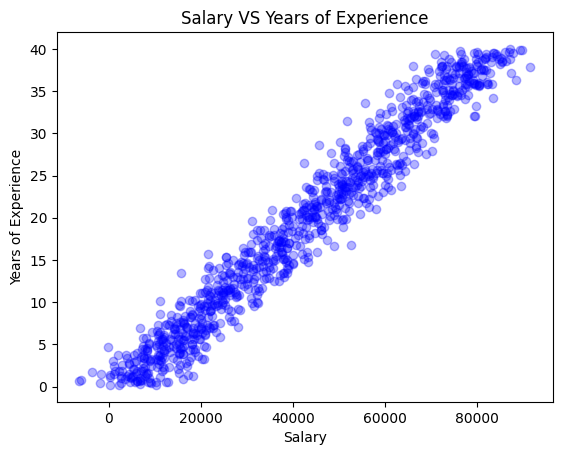

In [23]:
plt.title("Salary VS Years of Experience")
plt.scatter(df['Salary'], df['Years_of_Experience'], color='blue', alpha=0.3)
plt.xlabel("Salary")
plt.ylabel("Years of Experience")
plt.show()

In [11]:
df.corr()

,Years_of_Experience,Salary
Years_of_Experience,1.000000,0.977974
Salary,0.977974,1.000000


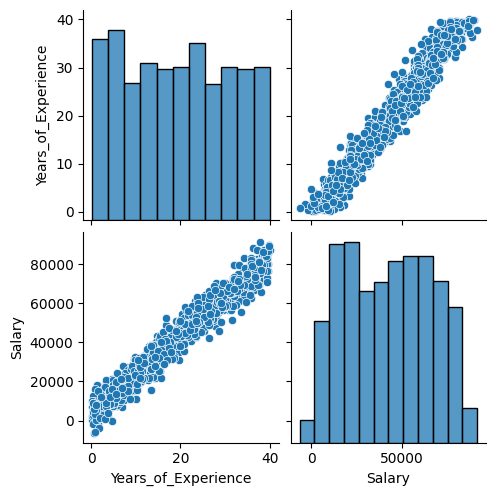

In [25]:
sns.pairplot(df)

In [87]:
X = df[["Years_of_Experience"]]
y = df['Salary']

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [91]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [94]:
model.coef_[0]

np.float64(1978.0373263854233)

In [95]:
model.intercept_

np.float64(3948.761703649383)

In [79]:
def regression_home_made(years_of_experience):
  M = 1978.0373263854233
  B = 3948.761703649383
  salary = M * years_of_experience + B
  return salary
regression_home_made(5)

13838.948335576499

In [71]:
X = df['Years_of_Experience']
y = df['Salary']

In [72]:
X_test, X_train, y_test, y_train = train_test_split(X, y, train_size = 0.2, random_state=42)

In [80]:
model = LinearRegression()
model.fit(X_train, y_train) # Scikit learn needs a dataframe not a series

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [81]:
import pickle

In [82]:
with open('salary_model.pkl', 'wb') as file:
  pickle.dump(model, file)

In [83]:
!pip install gradio

In [98]:
import gradio as gr

In [92]:
def predict_salary(years_of_experience):
  salary = model.predict([[years_of_experience]])[0]
  return f"Predicted Salary: ${round(salary, 2)}"

In [93]:
predict_salary(1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'Predicted Salary: $5926.8'

In [96]:
model.predict([[32]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([67245.95614798])

In [102]:
iface = gr.Interface(
    fn = predict_salary,
    inputs = gr.Number(label='Years of experience'),
    outputs = gr.Textbox(label='Predicted salary'),
    title = 'Salary predictor',
    description = 'Enter Years of Experience to predict salary'
)

In [104]:
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5339328ccf62736c61.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
